# Miscellaneous things
발표자 : 통합과정 최찬혁

학습을 하다보면 overfitting 문제가 자주 발생하곤 합니다. 이를 방지하기 위해서 regularization, dropout 및 batch_normalization이 쓰입니다.

이 코드에서는 tensorflow에서 위 3가지 방법을 이용하는 코드에 대해서 설명하고자 합니다.

## Import pakages

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

## Download and preprocess data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train, x_valid = x_train[:50000], x_train[50000:]
y_train, y_valid = y_train[:50000], y_train[50000:]

x_train = x_train.reshape(50000,28*28)/255
x_valid = x_valid.reshape(-1, 28*28)/255    
x_test  = x_test.reshape(-1, 28*28)/255

## Set hyperparameters

In [4]:
MAX_EPOCHS = 100
LR = 0.01

## Regularization

regularization 방법은 loss function에 penalty를 더해서 학습하는 것입니다.

즉, 기존의 loss function을 $L_{0}$이라고 했을 때 loss function을 다음과 같이 계산하는 것으로 볼 수 있습니다.

$L = L_{0} +  \lambda _{l1} \left( \sum \left| w_{i} \right| \right)+\lambda _{l2} \left( \sum w_{i}^2\right)$

$\lambda _{l1} , \lambda _{l2}$는 하이퍼파라미터로서 적절한 값을 정해야 됩니다.

tensorflow에서는 layer 안에 kernel_regularizer, bias_regularizer 옵션으로 적용할 수 있습니다.



In [5]:
regular1 = tf.keras.regularizers.L1L2(l1 = 0.0001, l2=0.001)
regular2 = tf.keras.regularizers.L1L2(l1 = 0.0001, l2=0.001)

In [6]:
input_tensor1 = Input(28*28)
x1 = Dense(100, activation='sigmoid', kernel_regularizer = regular1, bias_regularizer = regular1)(input_tensor1)
x1 = Dense(10, activation='softmax', kernel_regularizer = regular2, bias_regularizer = regular2)(x1)

model1 = Model(inputs=input_tensor1, outputs=x1)
optim = tf.keras.optimizers.SGD(learning_rate=LR)
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=optim, metrics=['accuracy'])

In [7]:
history1 = model1.fit(x_train, y_train, batch_size=250, epochs=MAX_EPOCHS, validation_data=(x_valid, y_valid))

Epoch 1/100
200/200 [==============================] - 2s 8ms/step - loss: 2.7311 - accuracy: 0.3172 - val_loss: 2.5963 - val_accuracy: 0.5104
Epoch 2/100
200/200 [==============================] - 1s 6ms/step - loss: 2.4934 - accuracy: 0.5928 - val_loss: 2.3777 - val_accuracy: 0.6723
Epoch 3/100
200/200 [==============================] - 2s 10ms/step - loss: 2.2926 - accuracy: 0.6768 - val_loss: 2.1823 - val_accuracy: 0.7305
Epoch 4/100
200/200 [==============================] - 2s 12ms/step - loss: 2.1143 - accuracy: 0.7188 - val_loss: 2.0104 - val_accuracy: 0.7594
Epoch 5/100
200/200 [==============================] - 1s 7ms/step - loss: 1.9595 - accuracy: 0.7440 - val_loss: 1.8630 - val_accuracy: 0.7853
Epoch 6/100
200/200 [==============================] - 1s 6ms/step - loss: 1.8281 - accuracy: 0.7661 - val_loss: 1.7394 - val_accuracy: 0.8021
Epoch 7/100
200/200 [==============================] - 2s 8ms/step - loss: 1.7179 - accuracy: 0.7826 - val_loss: 1.6358 - val_accuracy: 0.81

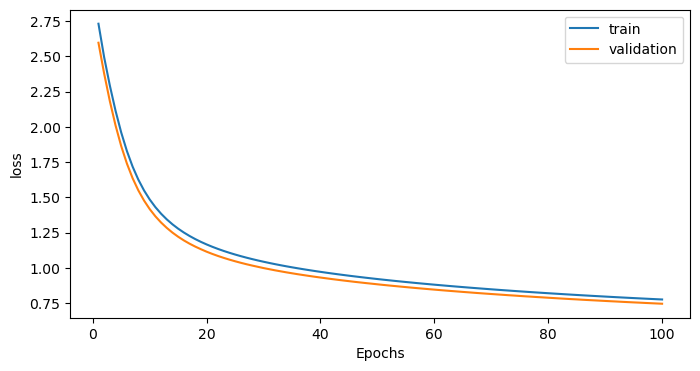

In [8]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, MAX_EPOCHS+1), history1.history['loss'], label='train')
plt.plot(np.arange(1, MAX_EPOCHS+1), history1.history['val_loss'], label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

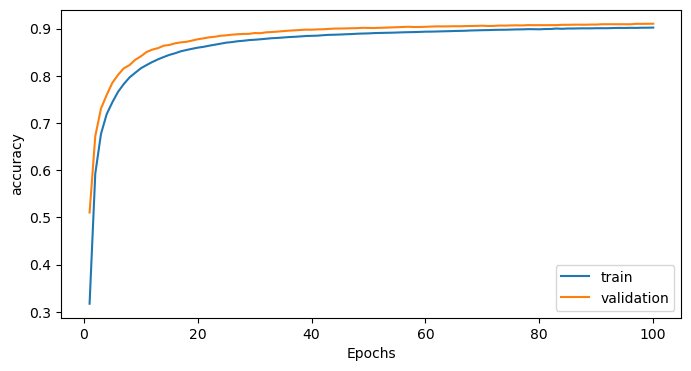

In [9]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, MAX_EPOCHS+1), history1.history['accuracy'], label='train')
plt.plot(np.arange(1, MAX_EPOCHS+1), history1.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

In [10]:
pred1 = model1.predict(x_test)
pred_label1 = np.argmax(pred1, axis = 1)
test_acc1 = np.sum(pred_label1==y_test)/y_test.shape[0]
print('Test Accuracy:', test_acc1*100, '%')

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 90.86999999999999 %


## Dropout
Drop-out은 서로 연결된 layer에서 일정 확률 $p$로 뉴런을 제거하서 학습하는 방법입니다.

여기서 일정 확률 $p$는 하이퍼파라미터로 적절한 값을 정해야 됩니다.

다만, 뉴런을 제거하는 것은 학습과정에서만 적용되며 검증과정에서는 적용하지 않습니다.

tensorflow에서는 Dropout layer를 layer 사이에 추가해서 적용할 수 있습니다.

In [11]:
input_tensor2 = Input(28*28)
x2 = Dense(100, activation='sigmoid')(input_tensor2)
x2 = tf.keras.layers.Dropout(0.5)(x2)
x2 = Dense(10, activation='softmax')(x2)

model2 = Model(inputs=input_tensor2, outputs=x2)
optim = tf.keras.optimizers.SGD(learning_rate=LR)
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=optim, metrics=['accuracy'])

In [12]:
history2 = model2.fit(x_train, y_train, batch_size=250, epochs=MAX_EPOCHS, validation_data=(x_valid, y_valid))

Epoch 1/100
200/200 [==============================] - 3s 8ms/step - loss: 2.3595 - accuracy: 0.1431 - val_loss: 2.0612 - val_accuracy: 0.5332
Epoch 2/100
200/200 [==============================] - 1s 6ms/step - loss: 2.1300 - accuracy: 0.2411 - val_loss: 1.8732 - val_accuracy: 0.6687
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 1.9515 - accuracy: 0.3329 - val_loss: 1.7109 - val_accuracy: 0.7108
Epoch 4/100
200/200 [==============================] - 1s 6ms/step - loss: 1.7967 - accuracy: 0.4088 - val_loss: 1.5655 - val_accuracy: 0.7532
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 1.6715 - accuracy: 0.4655 - val_loss: 1.4351 - val_accuracy: 0.7743
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 1.5558 - accuracy: 0.5123 - val_loss: 1.3188 - val_accuracy: 0.7884
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 1.4633 - accuracy: 0.5459 - val_loss: 1.2177 - val_accuracy: 0.8033

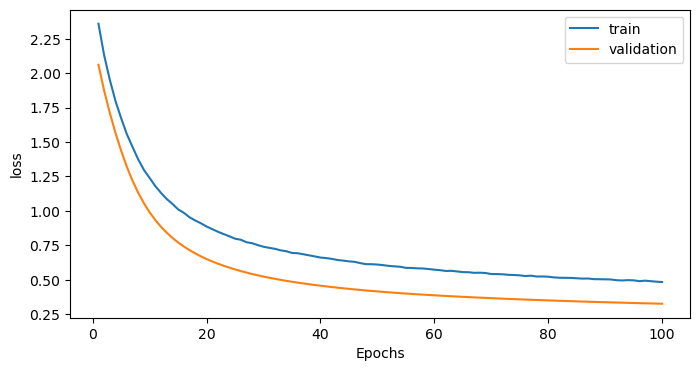

In [13]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, MAX_EPOCHS+1), history2.history['loss'], label='train')
plt.plot(np.arange(1, MAX_EPOCHS+1), history2.history['val_loss'], label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

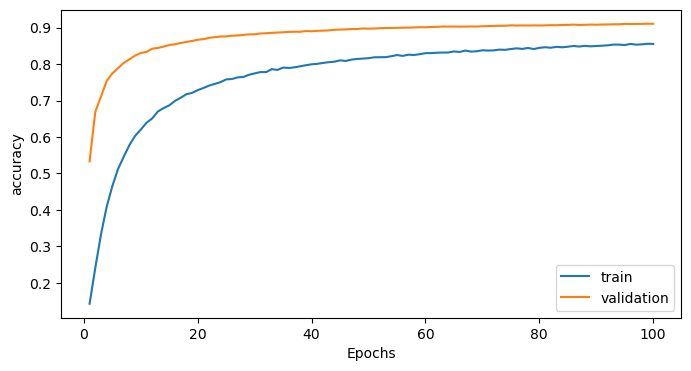

In [14]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, MAX_EPOCHS+1), history2.history['accuracy'], label='train')
plt.plot(np.arange(1, MAX_EPOCHS+1), history2.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

In [15]:
pred2 = model2.predict(x_test)
pred_label2 = np.argmax(pred2, axis = 1)
test_acc2 = np.sum(pred_label2==y_test)/y_test.shape[0]
print('Test Accuracy:', test_acc2*100, '%')

313/313 [==============================] - 1s 3ms/step
Test Accuracy: 90.74 %


## Batch normalization

Batch normalization은 층으로 들어가는 입력값이 한쪽으로 쏠리거나 너무 퍼지거나 너무 좁아지지 않게 해주는 인공신경망 기법입니다.

여러 입력값을 모은 배치에 대해, 각 층의 입력값의 평균과 표준편차를 다시 맞추어 주어, 입력값이 쏠리는 것을 방지합니다.

tensorflow에서는 Batch normalization layer를 layer 사이에 추가해서 적용할 수 있습니다.

In [16]:
input_tensor3 = Input(28*28)
x3 = Dense(100, activation='sigmoid')(input_tensor3)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = Dense(10, activation='softmax')(x3)

model3 = Model(inputs=input_tensor3, outputs=x3)
optim = tf.keras.optimizers.SGD(learning_rate=LR)
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=optim, metrics=['accuracy'])

In [17]:
history3 = model3.fit(x_train, y_train, batch_size=250, epochs=MAX_EPOCHS, validation_data=(x_valid, y_valid))

Epoch 1/100
200/200 [==============================] - 2s 8ms/step - loss: 0.8057 - accuracy: 0.7576 - val_loss: 1.3991 - val_accuracy: 0.7281
Epoch 2/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4668 - accuracy: 0.8677 - val_loss: 0.5917 - val_accuracy: 0.8881
Epoch 3/100
200/200 [==============================] - 1s 7ms/step - loss: 0.4150 - accuracy: 0.8835 - val_loss: 0.3862 - val_accuracy: 0.8965
Epoch 4/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3869 - accuracy: 0.8913 - val_loss: 0.3507 - val_accuracy: 0.9037
Epoch 5/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3702 - accuracy: 0.8951 - val_loss: 0.3371 - val_accuracy: 0.9063
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3583 - accuracy: 0.8992 - val_loss: 0.3283 - val_accuracy: 0.9096
Epoch 7/100
200/200 [==============================] - 2s 8ms/step - loss: 0.3485 - accuracy: 0.9008 - val_loss: 0.3205 - val_accuracy: 0.9124

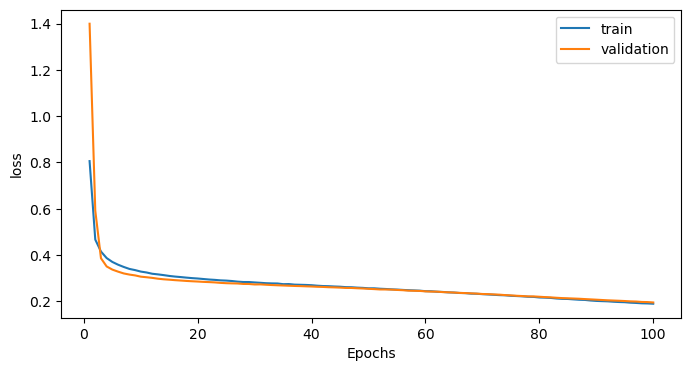

In [18]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, MAX_EPOCHS+1), history3.history['loss'], label='train')
plt.plot(np.arange(1, MAX_EPOCHS+1), history3.history['val_loss'], label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

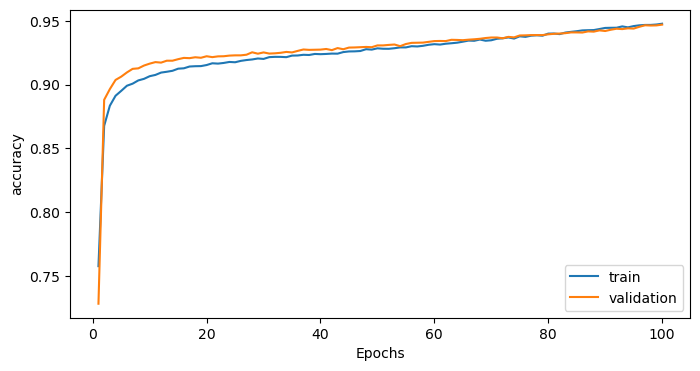

In [19]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, MAX_EPOCHS+1), history3.history['accuracy'], label='train')
plt.plot(np.arange(1, MAX_EPOCHS+1), history3.history['val_accuracy'], label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

In [20]:
pred3 = model3.predict(x_test)
pred_label3 = np.argmax(pred3, axis = 1)
test_acc3 = np.sum(pred_label3==y_test)/y_test.shape[0]
print('Test Accuracy:', test_acc2*100, '%')

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 90.74 %
